In [1]:
import pandas as pd
import geopandas as gpd
import camelot

Camelot allows to read pdf an extract tables with just a few lines. It's not necessary separate pages  with only tables before, you can especify it in **pages**

In [2]:
#Readig the pdf and creating tables object
tables=camelot.read_pdf("tablas.pdf",pages="1-end")

Camelot has different ways to manipulate differents type of tables. <br>
In this case I don't need the three first rows where some data are store  but if you need it you can look for [here](https://camelot-py.readthedocs.io/en/master/) how the object is constructed. Here a example of my tables
![Example](tabExample.png)


In [3]:
litables=[]  #litables store  a df por each table object, then it can be concat
accu=pd.DataFrame() #store the report of each table to plot the histogram accuracy
for table in tables:
    accu=accu.append(table.parsing_report,ignore_index=True)
    single= table.df 
    single.columns=["cvemun","nombre","SUR"]
    single.drop([0,1,2],axis=0,inplace=True)
    litables.append(single)
finalTable=pd.concat(litables,ignore_index=True)

In [14]:
print(finalTable.head())
finalTable.shape

  cvemun              nombre                             SUR
0  02001            Ensenada  Noroeste II (Tijuana-Mexicali)
1  02002            Mexicali  Noroeste II (Tijuana-Mexicali)
2  02003              Tecate  Noroeste II (Tijuana-Mexicali)
3  02004             Tijuana  Noroeste II (Tijuana-Mexicali)
4  02005  Playas de Rosarito  Noroeste II (Tijuana-Mexicali)


(2331, 3)

array([[<AxesSubplot:title={'center':'accuracy'}>]], dtype=object)

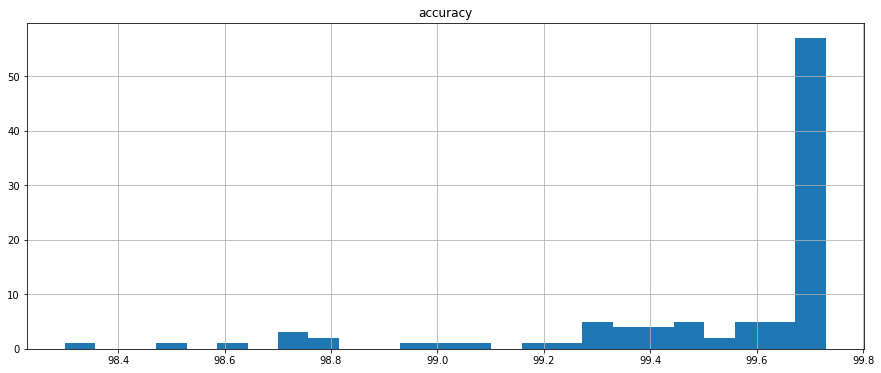

In [5]:
accu.hist(column="accuracy",bins=25,figsize=(15,6))

## In this part I just open the shape file that contain the thownships to merge with the df generate

In [21]:
mun=gpd.read_file("MXshpMun/mexico_mun.shp",
                  dtype={"CVEGEO":str,"CVE_ENT":str,"CVE_MUN":str})[["CVEGEO","CVE_ENT",
                                                                     "CVE_MUN","NOMGEO","geometry"]]
mun

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,geometry
0,11001,11,001,Abasolo,"POLYGON ((2542499.989 972096.149, 2542587.468 ..."
1,11002,11,002,Acámbaro,"POLYGON ((2638096.783 914363.603, 2638286.058 ..."
2,11003,11,003,San Miguel de Allende,"POLYGON ((2642103.190 1011596.592, 2642233.013..."
3,11004,11,004,Apaseo el Alto,"POLYGON ((2655068.363 948110.418, 2655060.133 ..."
4,11005,11,005,Apaseo el Grande,"POLYGON ((2646700.974 966708.527, 2646858.266 ..."
...,...,...,...,...,...
2464,12077,12,077,Marquelia,"POLYGON ((2856513.739 527167.374, 2856502.172 ..."
2465,12078,12,078,Cochoapa el Grande,"POLYGON ((2880958.073 582667.777, 2881149.242 ..."
2466,12079,12,079,José Joaquín de Herrera,"POLYGON ((2820812.443 617027.626, 2820818.617 ..."
2467,12080,12,080,Juchitán,"POLYGON ((2866969.842 514074.185, 2867907.668 ..."


In [26]:
geotable=pd.merge(mun,finalTable,left_on="CVEGEO",right_on="cvemun",how="outer")# save all the records

In [32]:
geotable.to_file("unio/munSUR.shp")# export to shapefile